In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import cv2
from scipy.spatial import Voronoi, voronoi_plot_2d

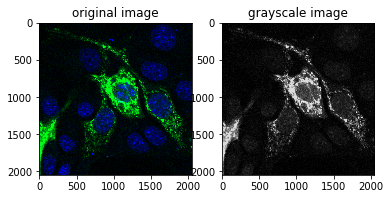

The shape of image without second arg is :(2048, 2048, 3)


In [2]:
img = cv2.imread('YFP0145-1_1.tif')
imgray = cv2.imread('YFP0145-1_1.tif',0)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title('grayscale image')
plt.imshow(imgray,cmap = 'gray')
plt.show()
print('The shape of image without second arg is :{}'.format(img.shape))

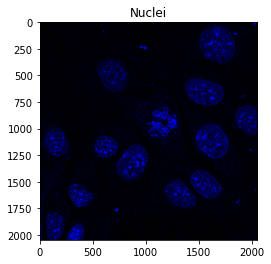

In [3]:
img_N =  cv2.imread('YFP0145-1_1.tif')
img_N[:,:,1] = 0
img_N[:,:,2]= 0
plt.title('Nuclei')
plt.imshow(cv2.cvtColor(img_N,cv2.COLOR_BGR2RGB))
plt.show()

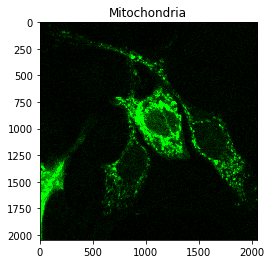

In [4]:
img2 =  cv2.imread('YFP0145-1_1.tif')
img2[:,:,0]= 0
img2[:,:,2]= 0
plt.title('Mitochondria')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

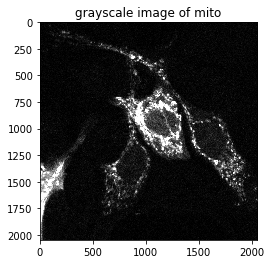

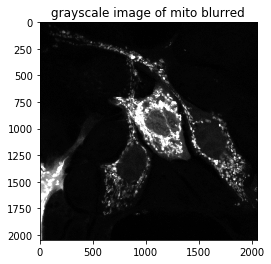

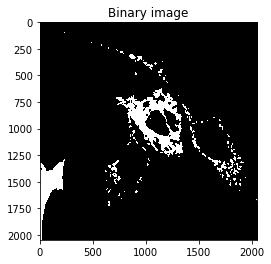

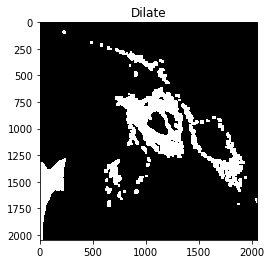

In [158]:
mito_grayimg = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.title('grayscale image of mito')
plt.imshow(mito_grayimg,cmap = 'gray')
plt.show()
blur_mito = cv2.blur(mito_grayimg,(7,7))
plt.title('grayscale image of mito blurred')
plt.imshow(blur_mito,cmap = 'gray')
plt.show()
(thresh1, im_bwmito) = cv2.threshold(blur_mito, 255, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title('Binary image')
plt.imshow(im_bwmito,'gray')
plt.show()
kernel1 = np.ones((20,20),np.uint8)
dilate_mito = cv2.dilate(im_bwmito,kernel1,iterations = 1)
plt.title('Dilate')
plt.imshow(dilate_mito,'gray')
plt.show()

In [159]:
label_mito=measure.label(dilate_mito,connectivity=2)
properties_mito = regionprops(label_mito)
#properties_mito[0].centroid
print(len(properties_mito))
masscenter_mito=[]
for pro in properties_mito:
    masscenter_mito.append(pro.centroid)
    print(pro.label,pro.centroid)
masscenter_mitop=np.array(masscenter_mito)
#print(len(masscenter_mitop))
masscenter_mitop[:, [0, 1]] = masscenter_mitop[:, [1, 0]]
print(masscenter_mitop)
#centerpoints_m[:,0]=masscenter_mitop[:,1]
#centerpoints_m[:,1]=masscenter_mitop[:,0]

#print(centerpoints_m)
#label_mito,nlbls_mito = ndimage.label(np.array(dilate_mito))
#masscenter_mito = np.array(ndimage.center_of_mass(np.array(opening),label_mito,np.arange(nlbls_mito)+1))
#print(masscenter_mito)

38
1 (94.99665831244779, 225.18212197159565)
2 (190.409307875895, 481.8747016706444)
3 (212.74142724745136, 579.4448563484708)
4 (245.21813186813188, 651.1994505494506)
5 (261.9631901840491, 722.5582822085889)
6 (353.8189611467023, 932.0918560169608)
7 (367.2888739946381, 1141.3894101876676)
8 (408.0, 845.5)
9 (504.5256, 1156.1761142857142)
10 (486.61831275720164, 898.2937242798354)
11 (934.8793265441527, 1073.3418353942816)
12 (691.4347240915208, 1291.4232839838492)
13 (729.5, 1310.5)
14 (1249.9271917582007, 1672.6454620031323)
15 (898.5326939843069, 1635.1325196163905)
16 (919.4842164599775, 1687.3872604284104)
17 (928.7611940298508, 1575.7974413646054)
18 (939.0238744884039, 1522.8206002728514)
19 (982.8301651604861, 1702.5855406668745)
20 (1063.6329398538505, 1770.2636312535133)
21 (1196.8031767955802, 980.7610497237569)
22 (1288.8841387856257, 1022.3754646840149)
23 (1543.411418601853, 93.69950667789676)
24 (1409.994672472899, 694.7740665245993)
25 (1318.9714285714285, 1900.941239

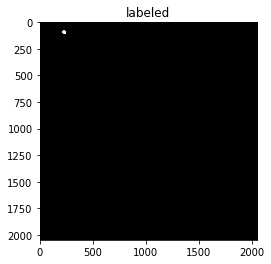

In [160]:
plt.title('labeled')
plt.imshow(label_mito==1,'gray')
plt.show()

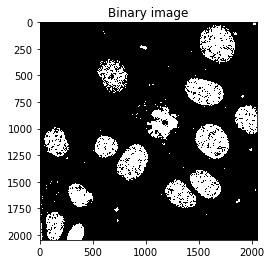

In [5]:
gray_image = cv2.cvtColor(img_N, cv2.COLOR_BGR2GRAY)
imgb = gray_image

(thresh, im_bw) = cv2.threshold(imgb, 255, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title('Binary image')
plt.imshow(im_bw,'gray')
plt.show()

#from he wang
#from PIL import Image
#import matplotlib.pyplot as plt
#from skimage import data, filters
#import numpy as np


#img=Image.open('/Users/hewang/Documents/lab/NewMyMiA/He/Test1.tif')
#r, g, b = img.split()
#blue=np.array(b)
#thresh = filters.threshold_otsu(blue)
#dst=(blue>=thresh)
#plt.imshow(dst,'gray')

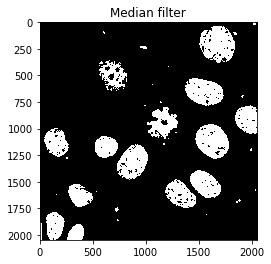

In [6]:
median = cv2.medianBlur(im_bw,5)
plt.title('Median filter')
plt.imshow(median,'gray')
plt.show()

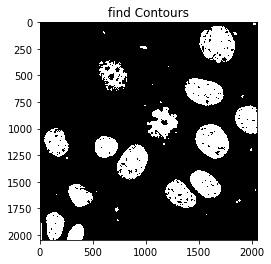

In [8]:
imgfill, contours, hierarchy = cv2.findContours(median,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.title('find Contours')
plt.imshow(imgfill,'gray')
plt.show()

for cnt in contours:
   cv2.drawContours(median,[cnt],0,255,-1)


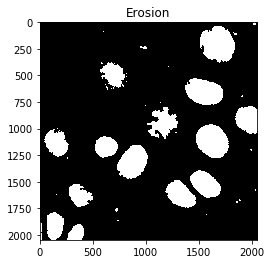

In [9]:
kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(imgfill,kernel,iterations = 1)
plt.title('Erosion')
plt.imshow(erosion,'gray')
plt.show()

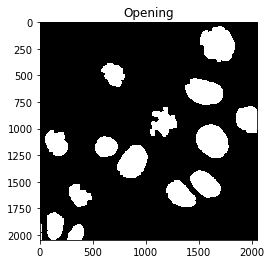

In [10]:
kernel = np.ones((25,25),np.uint8)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
plt.title('Opening')
plt.imshow(opening,'gray')
plt.show()

In [11]:
from skimage import measure,color
from skimage.measure import label, regionprops
from scipy.spatial import Voronoi

regions number: 15


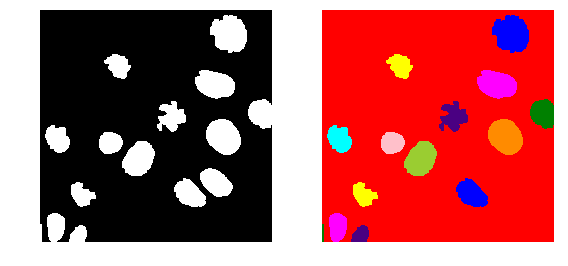

In [12]:
labels=measure.label(opening,connectivity=2)
dst=color.label2rgb(labels)
print('regions number:',labels.max())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(opening, plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dst,interpolation='nearest')
ax2.axis('off')
fig.tight_layout()
plt.show()

    1        335.000
    2        231.000
    3        355.000
    4        257.000
    5        278.000
    6        319.000
    7        243.000
    8        213.000
    9        313.000
   10        290.000
   11        283.000
   12        222.000
   13        257.000
   14        158.000
   15        158.000
208.37537796451687 1671.8819536363526
491.7150188365815 690.751535107235
656.468744429259 1543.5061649533543
915.0257749288388 1951.6953627541072
943.9927543006731 1158.6370372101721
1119.5310663364348 1619.6660954548497
1138.80761574852 154.99270997595843
1173.1631241920452 620.7875417130144
1314.9292234990871 872.811804777759
1524.255440760528 1554.4481851037083
1621.3654628374213 1319.7421422408481
1630.4971878515184 368.7482300006617
1913.9317998746978 139.01091918016647
1968.6797845898923 7.153686826843414
1982.4012661039537 342.11989115948467


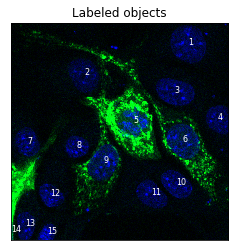

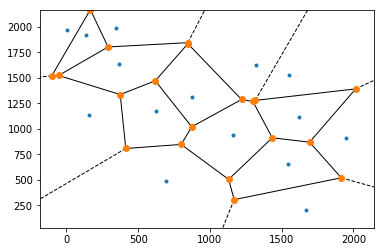

In [13]:
#fig.tight_layout()
#plt.show()
#skimage.measure.regionprops(labels)
#center=[]
#regions = regionprops(labels)
#for i in range(np.unique(labels).shape[0]):
#    print(regions[i].centroid)
#centerp=np.array(center)

from scipy import ndimage
blobs = img >0.75
properties = regionprops(labels)
#print 'Label \tLargest side'
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    print ('%5d %14.3f' % (p.label, max(max_row - min_row, max_col - min_col)))

fig = plt.figure()
ax = fig.add_subplot(111)    
ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax.set_title('Labeled objects')
plt.xticks([])
plt.yticks([])

#for p in properties:
#    center.append(prop.centroid)
#print(center)
#centerp=np.array(center)


#centerpoints[:,0]=centerp[:,1]
#centerpoints[:,1]=centerp[:,0]
lbl,nlbls = ndimage.label(np.array(opening))

r, c = np.vstack(ndimage.center_of_mass(np.array(opening),lbl,np.arange(nlbls)+1)).T
centerpoints = np.array(ndimage.center_of_mass(np.array(opening),lbl,np.arange(nlbls)+1))
centerpoints[:, [0, 1]] = centerpoints[:, [1, 0]]

for ri, ci, li in zip(r, c, range(1, nlbls+1)):
    print(ri,ci)
    ax.annotate(li, xy=(ci, ri), fontsize=8, color = 'white')
points = centerpoints
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

#print('centers',centerp)

In [14]:
from scipy.spatial import cKDTree

In [161]:
voronoi_kdtree = cKDTree(points)
extraPoints = []
imgSet = []
height, width = img2.shape[:2]
#for i in range(width):
#    for j in range(height):
#        if img[i,j,1]>1:#判断该像素点是否满足条件green > 1
extraPoints = masscenter_mitop #满足条件则添加到extraPoints里面
           # print(extraPoints)
test_point_dist, test_point_regions = voronoi_kdtree.query(extraPoints)#判断这一行的点所属区域
    #imgSet = #将extraPoints和对应的test_point_regions存储到imgSet里面
print(test_point_regions+1)

[ 2  2  2  2  2  2  2  2  3  2  5  3  3  6  6  6  6  6  6  6  9  9 12  9
  6  9  9  9 10 10 12 12  9  9  9 10 12 10]


In [162]:
true_regions=[]
true_regions=test_point_regions+1
true_regions

array([ 2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  5,  3,  3,  6,  6,  6,  6,
        6,  6,  6,  9,  9, 12,  9,  6,  9,  9,  9, 10, 10, 12, 12,  9,  9,
        9, 10, 12, 10])

In [163]:
true_regions[1]

2

In [164]:
nlbls

15

In [165]:
print(true_regions.shape[0])
shuzu = [[] for _ in range(nlbls+1)]

for i in range(true_regions.shape[0]):
    shuzu[true_regions[i]].append(i+1)
shuzu


38


[[],
 [],
 [1, 2, 3, 4, 5, 6, 7, 8, 10],
 [9, 12, 13],
 [],
 [11],
 [14, 15, 16, 17, 18, 19, 20, 25],
 [],
 [],
 [21, 22, 24, 26, 27, 28, 33, 34, 35],
 [29, 30, 36, 38],
 [],
 [23, 31, 32, 37],
 [],
 [],
 []]

In [166]:
def showandshoweachcell(shuzu):
    for i1 in range(len(shuzu)):
        imgoriginal = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        if len(shuzu[i1]) != 0:
            mask = (labels == i1)
            for i2 in range(len(shuzu[i1])):
                mask = mask|(label_mito==shuzu[i1][i2])
            get_high_vals = mask ==0
            imgoriginal[get_high_vals] = 0
            plt.title('Cell%i'%i1)
            plt.axis('off')
            plt.imshow(imgoriginal)
            plt.savefig("cells/test1_cell%s.png"%i1, dpi = 300)
            plt.show()
        
        
            

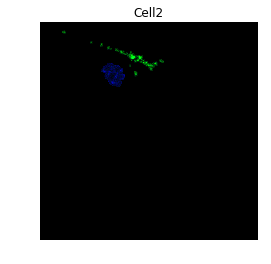

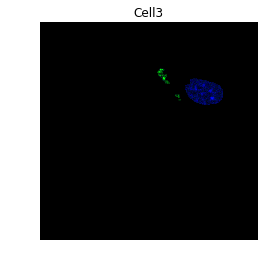

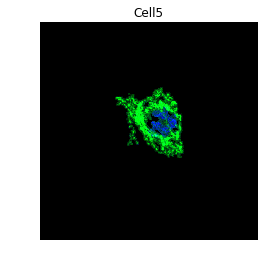

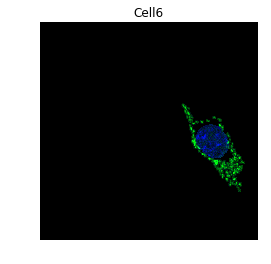

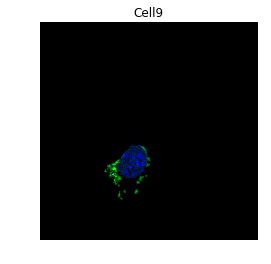

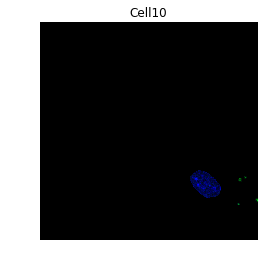

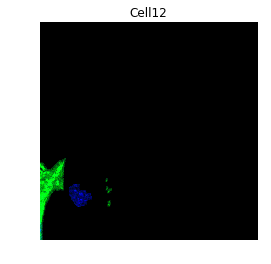

In [167]:
showandshoweachcell(shuzu)

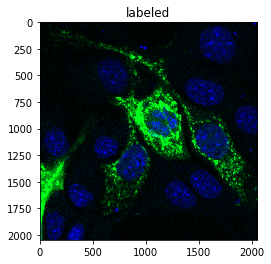

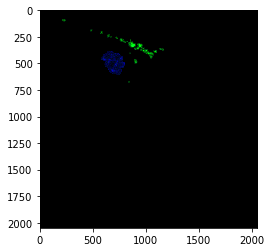

In [135]:
#def showeachcell(shuzu):
#    for elements in shuzu:
#        for i in elements.items():
            
    
plt.title('labeled')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
imgoriginal = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask= (labels==2)|(label_mito==1)|(label_mito==2)|(label_mito==3)|(label_mito==4)|(label_mito==5)|(label_mito==6)|(label_mito==7)|(label_mito==8)|(label_mito==9)|(label_mito==10)|(label_mito==12)|(label_mito==14)
get_high_vals = mask ==0
imgoriginal[get_high_vals] = 0


plt.imshow(imgoriginal)
plt.show()

In [123]:
print(shuzu[2])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14]


In [15]:
voronoi_kdtree = cKDTree(points)

In [16]:
print(centerpoints)

[[1671.88195364  208.37537796]
 [ 690.75153511  491.71501884]
 [1543.50616495  656.46874443]
 [1951.69536275  915.02577493]
 [1158.63703721  943.9927543 ]
 [1619.66609545 1119.53106634]
 [ 154.99270998 1138.80761575]
 [ 620.78754171 1173.16312419]
 [ 872.81180478 1314.9292235 ]
 [1554.4481851  1524.25544076]
 [1319.74214224 1621.36546284]
 [ 368.74823    1630.49718785]
 [ 139.01091918 1913.93179987]
 [   7.15368683 1968.67978459]
 [ 342.11989116 1982.4012661 ]]


In [18]:
extraPoints = [[1000,1100], [1000, 1150]]

In [19]:
test_point_dist, test_point_regions = voronoi_kdtree.query(extraPoints)

In [22]:
test_point_regions+1

array([5, 9])

In [17]:
size = img.shape
rect = (0, 0, size[1], size[0])
#print(rect)
subdiv = cv2.Subdiv2D(rect);
print(subdiv)
#for p in centerpoints:
    #subdiv.insert(p)

<Subdiv2D 000001F4DFA849B0>


In [ ]:
for p in centerpoints:
    subdiv.insert(p)

In [119]:
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.cv.CV_FILLED, cv2.CV_AA, 0 )

In [120]:
def draw_voronoi(img, subdiv) :
 
    ( facets, centers) = subdiv.getVoronoiFacetList([])
 
    for i in xrange(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
         
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
 
        cv2.fillConvexPoly(img, ifacet, color, cv2.CV_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.CV_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.cv.CV_FILLED, cv2.CV_AA, 0)
 

In [ ]:
points_color = (255, 255, 255)

In [ ]:
img_voronoi = np.zeros(img.shape, dtype = img.dtype)

In [ ]:
draw_voronoi(img_voronoi,subdiv)

In [ ]:
 cv2.imshow(win_voronoi,img_voronoi)
    cv2.waitKey(0)